In [109]:
!pip install pandas matplotlib openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [110]:
import numpy as np
import pandas as pd


In [111]:
# Excel dosyasının yolu
excel_dosyasi = 'veriler.xlsx'

# Çekmek istediğiniz sayfanın adı
sayfa_adi = 'assignment4-1a'
promo = 'PromotionDates'
# Belirli bir sayfayı oku
sales_data = pd.read_excel(excel_dosyasi, sheet_name=sayfa_adi)

# DataFrame'i görüntüle
print(sales_data)

              Date  StoreCode  ProductCode  SalesQuantity
0       2015-01-01          8            9             -1
1       2015-01-01        131            9              1
2       2015-01-01        144            9              2
3       2015-01-01        203            9              2
4       2015-01-01        256            9              0
...            ...        ...          ...            ...
1048570 2015-05-01        157          190              3
1048571 2015-05-01        165          190              3
1048572 2015-05-01        166          190              1
1048573 2015-05-01        171          190             12
1048574 2015-05-01        174          190              1

[1048575 rows x 4 columns]


In [112]:
promotion_data = pd.read_excel(excel_dosyasi, sheet_name=promo)

In [113]:
promotion_data = promotion_data.rename(columns={"Column2":"start_date","Column3":"end_date"})
promotion_data = promotion_data.drop([0])

In [114]:
promotion_data = promotion_data.loc[1:4]

In [115]:
# Verileri incele
print(sales_data.head())
print(promotion_data.head())

# Tarih formatını düzelt
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
promotion_data['start_date'] = pd.to_datetime(promotion_data['start_date'])
promotion_data['end_date'] = pd.to_datetime(promotion_data['end_date'])

# Eksik değerlerin kontrolü
print(sales_data.isnull().sum())
print(promotion_data.isnull().sum())

# Gerekirse eksik değerlerin çıkarımı
sales_data = sales_data.dropna()
promotion_data = promotion_data.dropna()


        Date  StoreCode  ProductCode  SalesQuantity
0 2015-01-01          8            9             -1
1 2015-01-01        131            9              1
2 2015-01-01        144            9              2
3 2015-01-01        203            9              2
4 2015-01-01        256            9              0
  Column1 start_date   end_date
1  Promo1  2/10/2015  2/17/2015
2  Promo2  3/15/2015  3/22/2015
3  Promo3  5/24/2015   6/1/2015
4  Promo4  6/21/2015  6/28/2015
Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64
Column1       0
start_date    0
end_date      0
dtype: int64


In [117]:

# Her ürün ve mağaza için toplam satış miktarını hesapla
toplam_satis = sales_data.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].sum().reset_index()

# DataFrame'i daha anlaşılır hale getirmek için yeniden adlandır
toplam_satis = toplam_satis.rename(columns={'ProductCode': 'Ürün Kodu', 'StoreCode': 'Mağaza Kodu', 'SalesQuantity': 'Toplam Satış Miktarı'})

# Sadeleştirilmiş DataFrame'i görüntüle
print("Sadeleştirilmiş DataFrame:")
toplam_satis

Sadeleştirilmiş DataFrame:


,Ürün Kodu,Mağaza Kodu,Toplam Satış Miktarı
0,1,1,20
1,1,2,52
2,1,3,39
3,1,4,12
4,1,5,23
...,...,...,...
51711,317,335,1
51712,317,337,3
51713,317,338,4
51714,317,339,2


In [118]:
# Toplam satış miktarına göre ürünleri azalan sırayla sırala
toplam_satis = toplam_satis.sort_values(by='Toplam Satış Miktarı', ascending=False)
# Her mağaza için en çok satılan ürünü bul
en_cok_satis_urunler = toplam_satis.loc[toplam_satis.groupby('Mağaza Kodu')['Toplam Satış Miktarı'].idxmax()]

# Sadeleştirilmiş DataFrame'i görüntüle
print("Her Mağaza için En Çok Satılan Ürün:")
print(en_cok_satis_urunler)

Her Mağaza için En Çok Satılan Ürün:
       Ürün Kodu  Mağaza Kodu  Toplam Satış Miktarı
43035        168            1                  1151
43036        168            2                  2312
43037        168            3                   489
42364        166            4                  1080
42703        167            5                   662
...          ...          ...                   ...
42694        166          336                   508
42695        166          337                   846
43369        168          338                   936
43370        168          339                   690
43371        168          340                  1498

[340 rows x 3 columns]


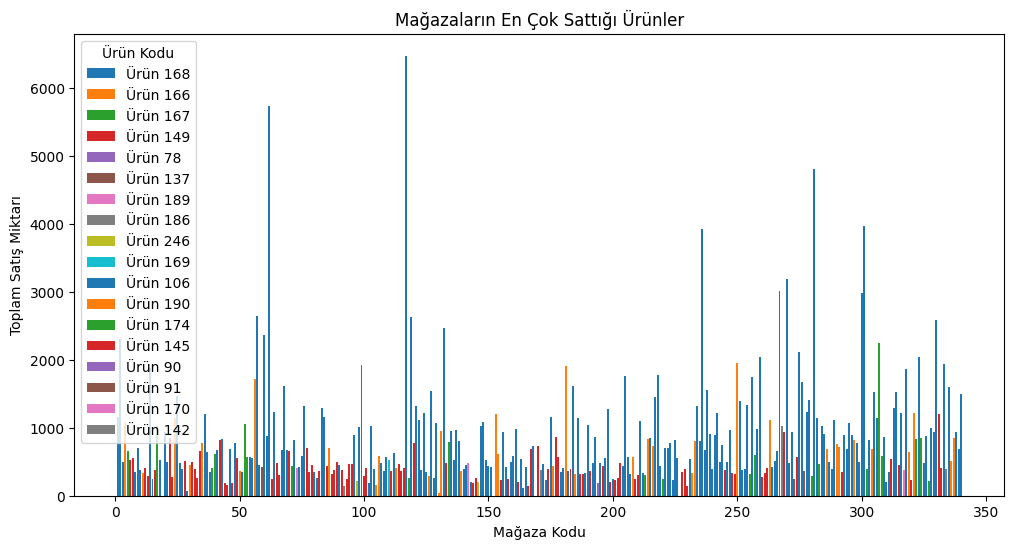

In [119]:
# Görselleştirme
import matplotlib.pyplot as plt

# Görselleştirme
plt.figure(figsize=(12, 6))

# Çubuk grafiği çiz
for product_code in en_cok_satis_urunler['Ürün Kodu'].unique():
    subset = en_cok_satis_urunler[en_cok_satis_urunler['Ürün Kodu'] == product_code]
    plt.bar(subset['Mağaza Kodu'], subset['Toplam Satış Miktarı'], label=f'Ürün {product_code}')

# Grafiğe başlık ve etiketler ekle
plt.title('Mağazaların En Çok Sattığı Ürünler')
plt.xlabel('Mağaza Kodu')
plt.ylabel('Toplam Satış Miktarı')
plt.legend(title='Ürün Kodu')

# Grafiği göster
plt.show()

In [133]:
benzersiz_veriler = sales_data["StoreCode"].unique()
len(benzersiz_veriler)
#kaç mağaza var toplamda

340

In [134]:
promotion_data

,Column1,start_date,end_date
1,Promo1,2015-02-10,2015-02-17
2,Promo2,2015-03-15,2015-03-22
3,Promo3,2015-05-24,2015-06-01
4,Promo4,2015-06-21,2015-06-28


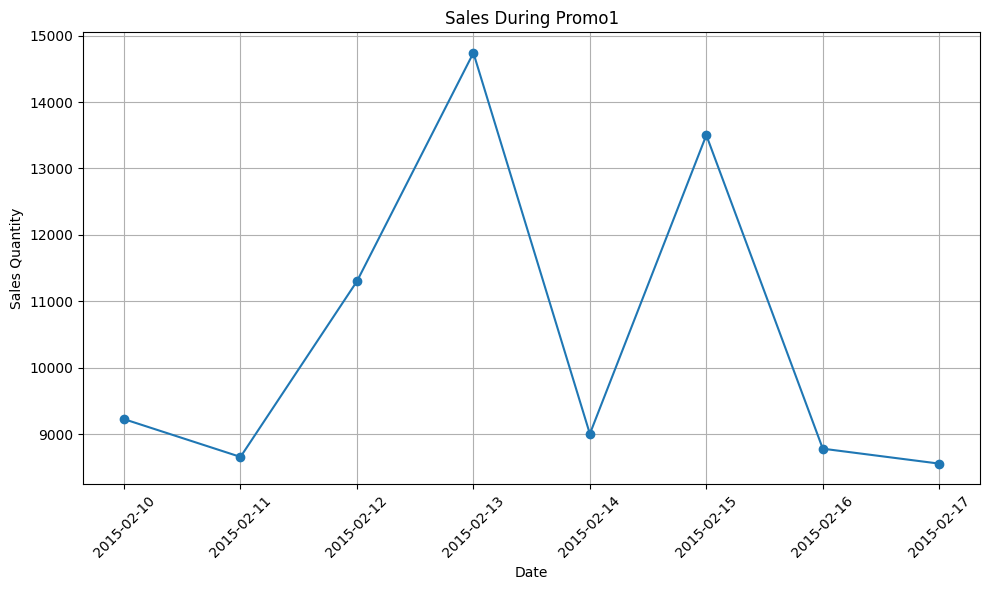

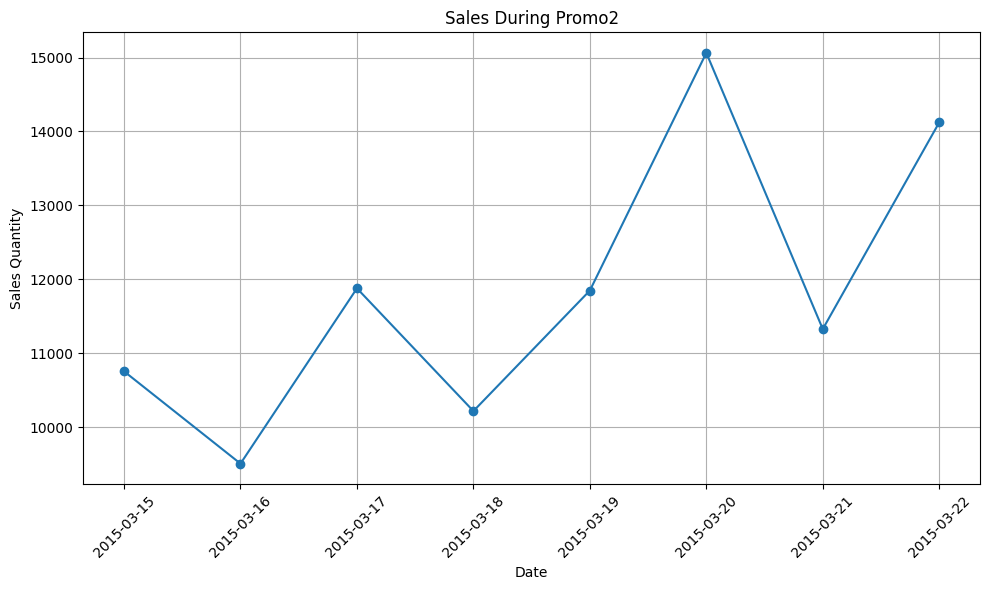

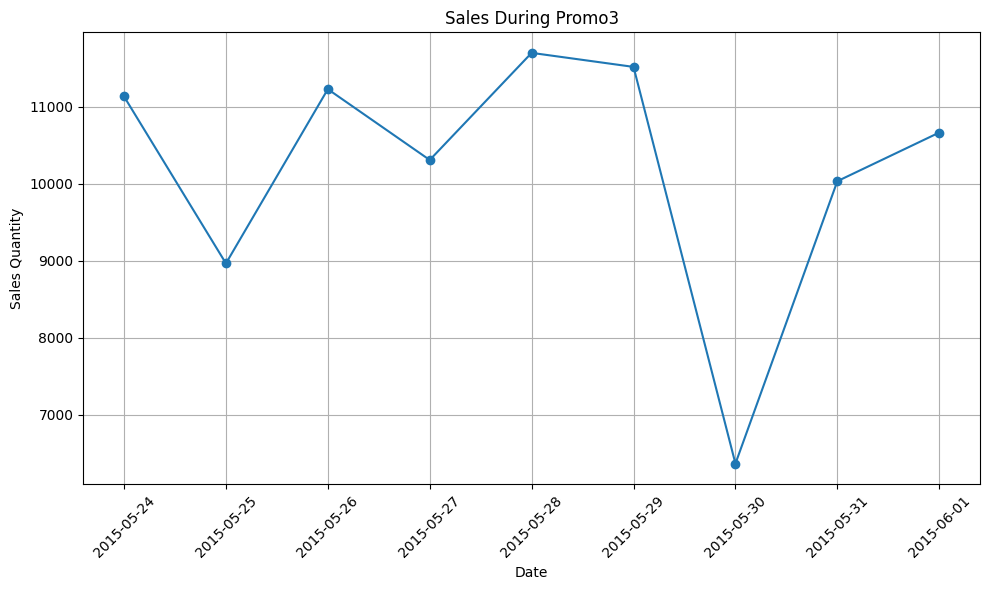

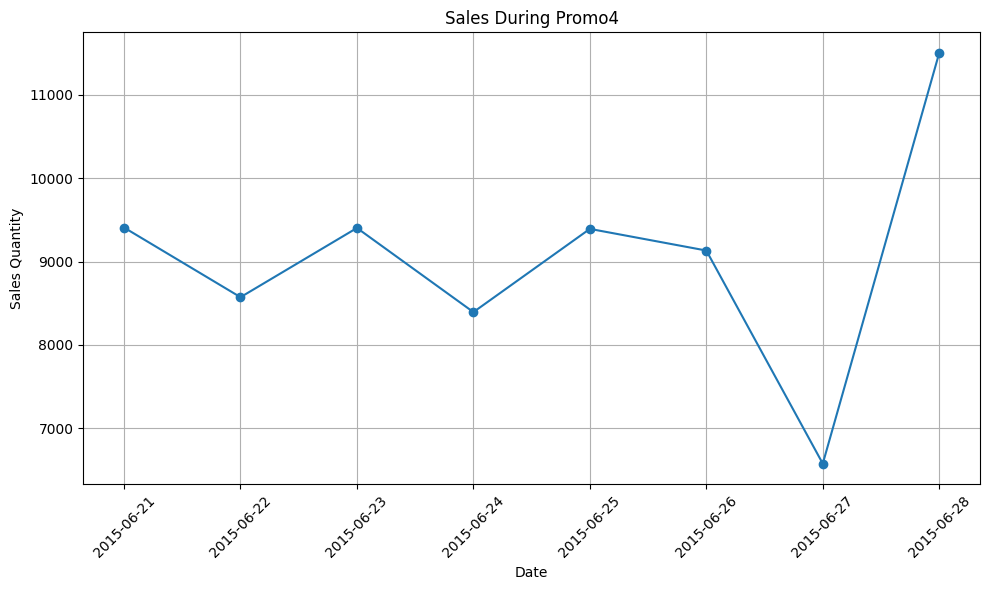

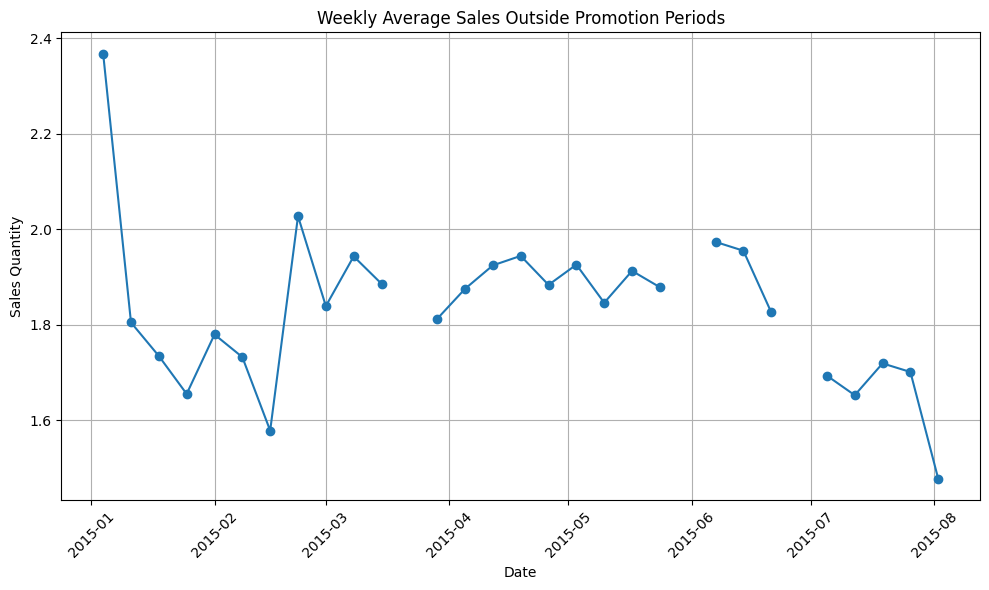

In [135]:
df_original = sales_data
# Her promosyon dönemi için satışları filtrele ve görselleştir
for i, promo in promotion_data.iterrows():
    promo_name = promo['Column1']
    start_date = promo['start_date']
    end_date = promo['end_date']
    
# Promosyon dönemi boyunca satışları filtrele
    promo_sales = df_original[(df_original['Date'] >= start_date) & (df_original['Date'] <= end_date)]
    
    # Toplam satış miktarını hesapla
    total_sales = promo_sales.groupby('Date')['SalesQuantity'].sum().reset_index()
    
    # Görselleştirme
    plt.figure(figsize=(10, 6))
    plt.plot(total_sales['Date'], total_sales['SalesQuantity'], marker='o')
    plt.title(f'Sales During {promo_name}')
    plt.xlabel('Date')
    plt.ylabel('Sales Quantity')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Promosyon dışındaki satışları ele alıp haftalık ortalama hesaplama
df_original['Promo'] = df_original['Date'].apply(
    lambda x: any(start_date <= x <= end_date for start_date, end_date in zip(promotion_data['start_date'], promotion_data['end_date']))
)

non_promo_sales = df_original[~df_original['Promo']]
weekly_avg_sales = non_promo_sales.resample('W', on='Date')['SalesQuantity'].mean().reset_index()

# Haftalık ortalama satışları görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(weekly_avg_sales['Date'], weekly_avg_sales['SalesQuantity'], marker='o')
plt.title('Weekly Average Sales Outside Promotion Periods')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
    

# Hızlı, Orta ve Yavaş ürünleri ayırma kriterleriniz nelerdir? Neden?

In [136]:
# Mağazaların ortalama haftalık satışlarını hesaplayın
store_avg_sales = weekly_sales.groupby('StoreCode')['SalesQuantity'].mean().reset_index()

# Mağazaları hızlı, orta ve yavaş olarak sınıflandırın
quantiles = store_avg_sales['SalesQuantity'].quantile([0.33, 0.66])
store_avg_sales['category'] = pd.cut(store_avg_sales['SalesQuantity'], bins=[-np.inf, quantiles[0.33], quantiles[0.66], np.inf], labels=['Yavaş', 'Orta', 'Hızlı'])
store_avg_sales.head()

,StoreCode,SalesQuantity,category
0,1,2.988146,Orta
1,2,6.789687,Hızlı
2,3,2.329370,Yavaş
3,4,3.777995,Hızlı
4,5,2.821514,Orta


# Hızlı, Orta ve Yavaş ürünleri ayırma kriterleriniz nelerdir? Neden?

In [137]:
# Haftalık ortalama satışları hesapla
sales_data['week'] = sales_data['Date'].dt.isocalendar().week
weekly_sales = sales_data.groupby(['StoreCode','ProductCode', 'week'])['SalesQuantity'].sum().reset_index()

# Ürünlerin ortalama haftalık satışlarını hesapla
product_avg_sales = weekly_sales.groupby('ProductCode')['SalesQuantity'].mean().reset_index()

# Ürünleri hızlı, orta ve yavaş olarak sınıflandırma
quantiles = product_avg_sales['SalesQuantity'].quantile([0.33, 0.66])
product_avg_sales['category'] = pd.cut(product_avg_sales['SalesQuantity'], bins=[-np.inf, quantiles[0.33], quantiles[0.66], np.inf], labels=['Yavaş', 'Orta', 'Hızlı'])
print(product_avg_sales.head())


   ProductCode  SalesQuantity category
0            1       3.650016    Hızlı
1            2       3.135866    Hızlı
2            3       2.475732    Hızlı
3            4       2.968578    Hızlı
4            5       2.939086    Hızlı


In [138]:
# Promosyon dönemlerini haftalara çevirme
promotion_data['start_week'] = promotion_data['start_date'].dt.isocalendar().week
promotion_data['end_week'] = promotion_data['end_date'].dt.isocalendar().week
print(promotion_data)

  Column1 start_date   end_date  start_week  end_week
1  Promo1 2015-02-10 2015-02-17           7         8
2  Promo2 2015-03-15 2015-03-22          11        12
3  Promo3 2015-05-24 2015-06-01          21        23
4  Promo4 2015-06-21 2015-06-28          25        26


In [139]:
# Promosyon dönemleri için yeni bir sütun ekleme
weekly_sales['promotion'] = 0

for _, promo in promotion_data.iterrows():
    mask = (
        (weekly_sales['week'] >= promo['start_week']) & 
        (weekly_sales['week'] <= promo['end_week'])
    )
    weekly_sales.loc[mask, 'promotion'] = 1

weekly_sales.head()


,StoreCode,ProductCode,week,SalesQuantity,promotion
0,1,1,2,4,0
1,1,1,4,1,0
2,1,1,8,1,1
3,1,1,18,2,0
4,1,1,30,12,0


# Hangi ürünler promosyonlar sırasında en büyük satış artışını yaşadı?

In [140]:
# Promosyon dönemleri ve normal dönemler için ortalama haftalık satışları hesaplama
promo_sales = weekly_sales[weekly_sales['promotion'] == 1].groupby(['StoreCode', 'ProductCode'])['SalesQuantity'].mean().reset_index()
promo_sales.columns = ['StoreCode', 'ProductCode', 'avg_sales_promo']

non_promo_sales = weekly_sales[weekly_sales['promotion'] == 0].groupby(['StoreCode', 'ProductCode'])['SalesQuantity'].mean().reset_index()
non_promo_sales.columns = ['StoreCode', 'ProductCode', 'avg_sales_non_promo']

# Promosyon ve normal dönem satışlarını birleştirme
comparison = pd.merge(promo_sales, non_promo_sales, on=['StoreCode', 'ProductCode'], how='outer').fillna(0)
print(comparison.head())


   StoreCode  ProductCode  avg_sales_promo  avg_sales_non_promo
0          1            1         1.000000             3.800000
1          1            2         2.500000             1.400000
2          1            3         2.833333             1.500000
3          1            4         1.000000             1.333333
4          1            5         2.857143             1.166667


In [141]:
# Promosyon dönemleri ve normal dönemler için ortalama haftalık satışları hesaplama
promo_sales = weekly_sales[weekly_sales['promotion'] == 1]['SalesQuantity'].mean()
non_promo_sales = weekly_sales[weekly_sales['promotion'] == 0]['SalesQuantity'].mean()

print(f"Promosyon Dönemi Ortalama Haftalık Satış: {promo_sales}")
print(f"Normal Dönem Ortalama Haftalık Satış: {non_promo_sales}")


Promosyon Dönemi Ortalama Haftalık Satış: 3.4149032066573595
Normal Dönem Ortalama Haftalık Satış: 3.119543126956636


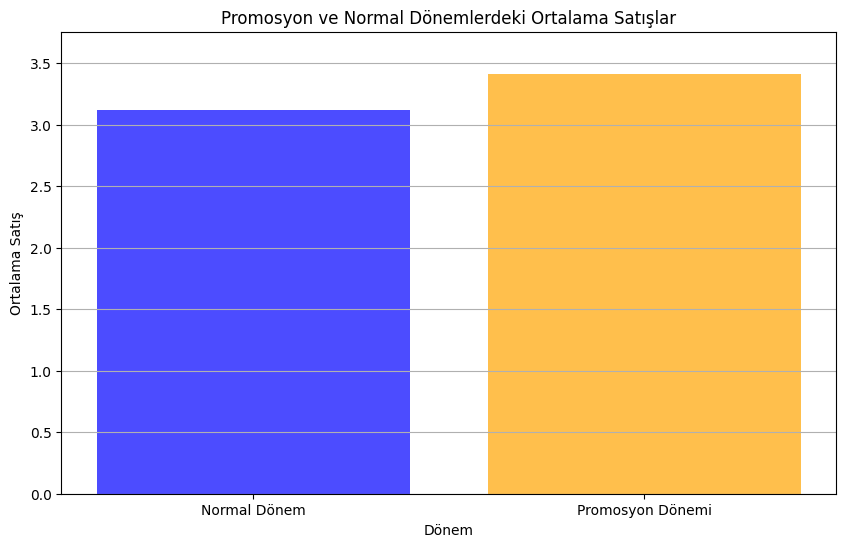

In [142]:
import matplotlib.pyplot as plt

# Bar grafiği ile görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(['Normal Dönem', 'Promosyon Dönemi'], [non_promo_sales, promo_sales], color=['blue', 'orange'], alpha=0.7)
plt.title('Promosyon ve Normal Dönemlerdeki Ortalama Satışlar')
plt.xlabel('Dönem')
plt.ylabel('Ortalama Satış')
plt.ylim(0, max(non_promo_sales, promo_sales) * 1.1)
plt.grid(axis='y')
plt.show()


In [143]:

# Satış artışını hesaplama
comparison['sales_increase'] = comparison['avg_sales_promo'] - comparison['avg_sales_non_promo']

# En büyük satış artışı yaşayan ürünleri bulma
top_products = comparison.sort_values(by='sales_increase', ascending=False).head(10)

# Sonuçları gösterme
print("En büyük satış artışını yaşayan ürünler ve satış adetleri:")
print(top_products[['ProductCode', 'avg_sales_promo', 'avg_sales_non_promo', 'sales_increase']])
#mağazalara göre ortalama en yüksek satış artışı olan ürünler

En büyük satış artışını yaşayan ürünler ve satış adetleri:
       ProductCode  avg_sales_promo  avg_sales_non_promo  sales_increase
49780          137             75.0                  5.0            70.0
43620          137             60.0                  0.0            60.0
30102          139             20.0                -40.0            60.0
35006          137             60.0                  0.0            60.0
21012          137             60.0                  0.0            60.0
4975           137             60.0                  0.0            60.0
2798           137             60.0                  0.0            60.0
12235          137             30.0                -30.0            60.0
19662          137             60.0                  5.0            55.0
43011          137             60.0                 15.0            45.0


In [144]:
top_products[['ProductCode', 'avg_sales_promo', 'avg_sales_non_promo', 'sales_increase']]

,ProductCode,avg_sales_promo,avg_sales_non_promo,sales_increase
49780,137,75.0,5.0,70.0
43620,137,60.0,0.0,60.0
30102,139,20.0,-40.0,60.0
35006,137,60.0,0.0,60.0
21012,137,60.0,0.0,60.0
4975,137,60.0,0.0,60.0
2798,137,60.0,0.0,60.0
12235,137,30.0,-30.0,60.0
19662,137,60.0,5.0,55.0
43011,137,60.0,15.0,45.0


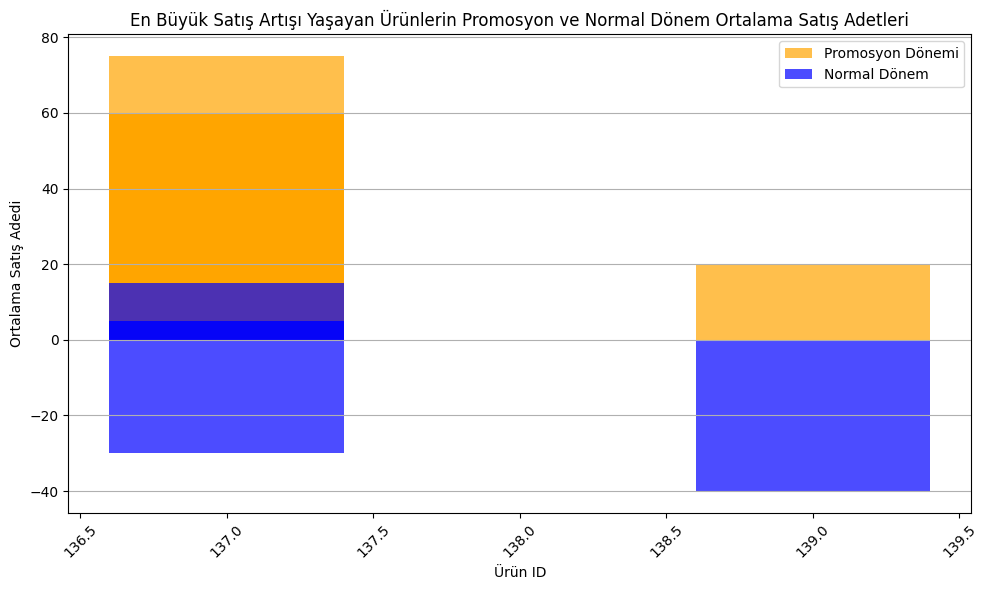

In [41]:
import matplotlib.pyplot as plt

# En büyük satış artışını yaşayan ürünlerin promosyon ve normal dönemlerdeki ortalama satış adetlerini seçme
top_products_sales = top_products[['ProductCode', 'avg_sales_promo', 'avg_sales_non_promo']]

# Ürün ID'leri x ekseninde, satış adetleri y ekseninde olacak şekilde bar grafiği çizme
plt.figure(figsize=(10, 6))
plt.bar(top_products_sales['ProductCode'], top_products_sales['avg_sales_promo'], color='orange', label='Promosyon Dönemi', alpha=0.7)
plt.bar(top_products_sales['ProductCode'], top_products_sales['avg_sales_non_promo'], color='blue', label='Normal Dönem', alpha=0.7)
plt.xlabel('Ürün ID')
plt.ylabel('Ortalama Satış Adedi')
plt.title('En Büyük Satış Artışı Yaşayan Ürünlerin Promosyon ve Normal Dönem Ortalama Satış Adetleri')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Daha yüksek promosyon tepkisi gösteren mağazalar var mı?

In [145]:
# Promosyon dönemlerinde ve normal dönemlerde mağaza bazında ortalama satışları hesaplama
promo_sales = weekly_sales[weekly_sales['promotion'] == 1].groupby('StoreCode')['SalesQuantity'].mean().reset_index()
promo_sales.columns = ['StoreCode', 'avg_sales_promo']

non_promo_sales = weekly_sales[weekly_sales['promotion'] == 0].groupby('StoreCode')['SalesQuantity'].mean().reset_index()
non_promo_sales.columns = ['StoreCode', 'avg_sales_non_promo']

# Promosyon ve normal dönem satışlarını birleştirme
comparison = pd.merge(promo_sales, non_promo_sales, on='StoreCode', how='outer').fillna(0)

# Promosyon tepkisini hesaplama
comparison['promotion_response'] = comparison['avg_sales_promo'] - comparison['avg_sales_non_promo']

# En yüksek promosyon tepkisine sahip mağazaları bulma ve sıralama
top_stores = comparison.sort_values(by='promotion_response', ascending=False)

print("En yüksek promosyon tepkisine sahip mağazalar:")


En yüksek promosyon tepkisine sahip mağazalar:


In [166]:
top_stores

,StoreCode,avg_sales_promo,avg_sales_non_promo,promotion_response
183,184,5.660952,4.259055,1.401897
267,268,5.506944,4.151871,1.355074
300,301,8.655431,7.335778,1.319653
51,52,5.330793,4.017770,1.313023
55,56,5.533003,4.243733,1.289271
...,...,...,...,...
181,182,1.702970,2.138282,-0.435312
136,137,2.843810,3.392727,-0.548918
120,121,2.628429,3.360161,-0.731732
323,324,3.267699,4.017891,-0.750192


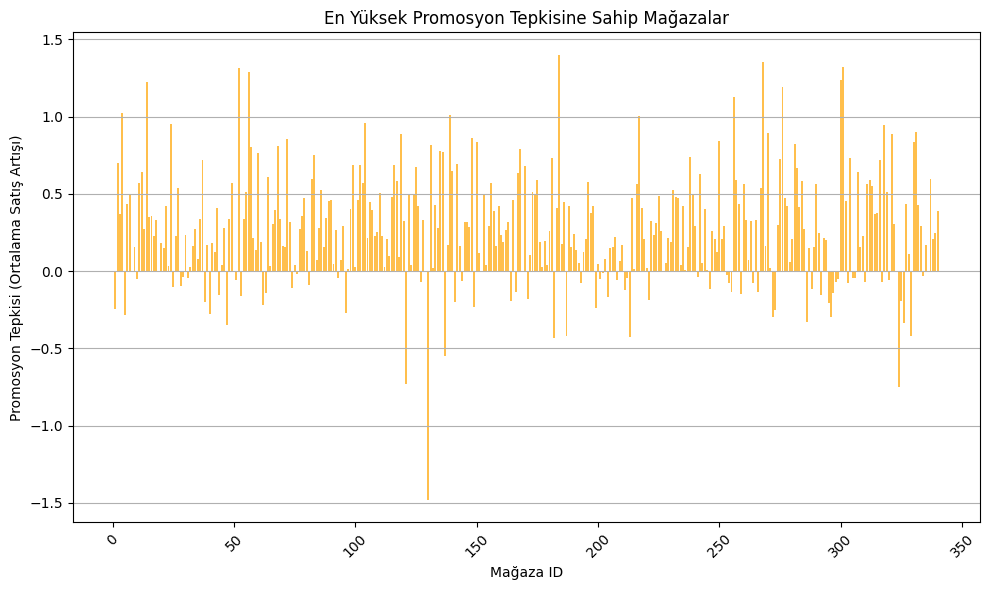

In [147]:
# En yüksek promosyon tepkisine sahip mağazaları görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(top_stores['StoreCode'], top_stores['promotion_response'], color='orange', alpha=0.7)
plt.xlabel('Mağaza ID')
plt.ylabel('Promosyon Tepkisi (Ortalama Satış Artışı)')
plt.title('En Yüksek Promosyon Tepkisine Sahip Mağazalar')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Hızlı ile Yavaş ürünler arasında promosyon etkileri açısından önemli bir fark var mı?

In [148]:
# Promosyon dönemlerinde ve normal dönemlerde mağaza ve ürün bazında ortalama satışları hesaplama
promo_sales_by_product = weekly_sales[weekly_sales['promotion'] == 1].groupby('ProductCode')['SalesQuantity'].mean().reset_index()
promo_sales_by_product.columns = ['ProductCode', 'avg_sales_promo']


non_promo_sales_by_product = weekly_sales[weekly_sales['promotion'] == 0].groupby('ProductCode')['SalesQuantity'].mean().reset_index()
non_promo_sales_by_product.columns = ['ProductCode', 'avg_sales_non_promo']

# Kategori sınırlarını belirleme
fast_threshold = promo_sales_by_product['avg_sales_promo'].quantile(0.75)
slow_threshold = promo_sales_by_product['avg_sales_promo'].quantile(0.25)


# Ürünleri kategorilere ayırma
def categorize_product(row):
    if row['avg_sales_promo'] >= fast_threshold:
        return 'Fast'
    elif row['avg_sales_promo'] <= slow_threshold:
        return 'Slow'
    else:
        return 'Medium'

# Ürünleri kategorilere ayırma
def categorize_product2(row):
    if row['avg_sales_non_promo'] >= fast_threshold:
        return 'Fast'
    elif row['avg_sales_non_promo'] <= slow_threshold:
        return 'Slow'
    else:
        return 'Medium'


promo_sales_by_product['category'] = promo_sales_by_product.apply(categorize_product, axis=1)
non_promo_sales_by_product['category'] = non_promo_sales_by_product.apply(categorize_product2, axis=1)


# Kategori bazında promosyon dönemlerinde ve normal dönemlerde ortalama satışları birleştirme
promo_sales_by_category = promo_sales_by_product.groupby('category')['avg_sales_promo'].mean().reset_index()
non_promo_sales_by_category = non_promo_sales_by_product.groupby('category')['avg_sales_non_promo'].mean().reset_index()

# Kategori bazında promosyon dönemlerinde ve normal dönemlerde ortalama satışları birleştirme
category_sales_comparison = pd.merge(promo_sales_by_category, non_promo_sales_by_category, on='category', suffixes=('_promo', '_non_promo'))

# Kategori bazında promosyon dönemlerinde ve normal dönemlerde ortalama satışları gösterme
print("Kategori bazında promosyon dönemlerinde ve normal dönemlerde ortalama satışlar:")
print(category_sales_comparison)


Kategori bazında promosyon dönemlerinde ve normal dönemlerde ortalama satışlar:
  category  avg_sales_promo  avg_sales_non_promo
0     Fast         6.026464             6.870606
1   Medium         1.480842             1.585391
2     Slow         0.519458             0.398655


# Hızlı ile Yavaş mağazalar arasında promosyon etkileri açısından önemli bir fark var mı?

In [107]:
# Promosyon dönemlerinde ve normal dönemlerde mağaza ve ürün bazında ortalama satışları hesaplama
promo_sales_by_store = weekly_sales[weekly_sales['promotion'] == 1].groupby('StoreCode')['SalesQuantity'].mean().reset_index()
promo_sales_by_store.columns = ['StoreCode', 'avg_sales_promo']

non_promo_sales_by_store = weekly_sales[weekly_sales['promotion'] == 0].groupby('StoreCode')['SalesQuantity'].mean().reset_index()
non_promo_sales_by_store.columns = ['StoreCode', 'avg_sales_non_promo']

# Kategori sınırlarını belirleme
fast_threshold = promo_sales_by_store['avg_sales_promo'].quantile(0.75)
slow_threshold = promo_sales_by_store['avg_sales_promo'].quantile(0.25)

# Mağazaları kategorilere ayırma
def categorize_store(row):
    if row['avg_sales_promo'] >= fast_threshold:
        return 'Fast'
    elif row['avg_sales_promo'] <= slow_threshold:
        return 'Slow'
    else:
        return 'Medium'

# Mağazaları kategorilere ayırma
def categorize_store2(row):
    if row['avg_sales_non_promo'] >= fast_threshold:
        return 'Fast'
    elif row['avg_sales_non_promo'] <= slow_threshold:
        return 'Slow'
    else:
        return 'Medium'

promo_sales_by_store['category'] = promo_sales_by_store.apply(categorize_store, axis=1)
non_promo_sales_by_store['category'] = non_promo_sales_by_store.apply(categorize_store2, axis=1)

# Kategori bazında promosyon dönemlerinde ve normal dönemlerde ortalama satışları birleştirme
promo_sales_by_store = promo_sales_by_store.groupby('category')['avg_sales_promo'].mean().reset_index()
non_promo_sales_by_store = non_promo_sales_by_store.groupby('category')['avg_sales_non_promo'].mean().reset_index()

# Kategori bazında promosyon dönemlerinde ve normal dönemlerde satışları birleştirme
category_sales_store = pd.merge(promo_sales_by_store, non_promo_sales_by_store,  on='category', suffixes=('_promo', '_non_promo'))

# Hızlı ve Yavaş mağazalar arasındaki promosyon etkilerini gösterme
print("Hızlı ve Yavaş mağazalar arasındaki promosyon etkileri:")
print(category_sales_store)


Hızlı ve Yavaş mağazalar arasındaki promosyon etkileri:
  category  avg_sales_promo  avg_sales_non_promo
0     Fast         4.998340             4.851642
1   Medium         2.947359             2.907000
2     Slow         2.012408             1.929777


In [152]:
# Promosyon dönemlerinde ve normal dönemlerde mağaza ve ürün bazında ortalama satışları hesaplama
promo_sales_other_stores = weekly_sales[weekly_sales['promotion'] == 1].groupby(['StoreCode', 'ProductCode'])['SalesQuantity'].mean().reset_index()
promo_sales_other_stores.columns = ['StoreCode', 'ProductCode', 'avg_sales_promo_other_stores']

non_promo_sales_other_stores = weekly_sales[weekly_sales['promotion'] == 0].groupby(['StoreCode', 'ProductCode'])['SalesQuantity'].mean().reset_index()
non_promo_sales_other_stores.columns = ['StoreCode', 'ProductCode', 'avg_sales_non_promo_other_stores']

# Diğer mağazalardaki promosyon ve normal dönem satışlarını birleştirme
comparison_other_stores = pd.merge(promo_sales_other_stores, non_promo_sales_other_stores, on=['StoreCode', 'ProductCode'], how='outer').fillna(0)

# Promosyonların satışlara etkisini hesaplama
comparison_other_stores['effect_of_promotions_other_stores'] = comparison_other_stores['avg_sales_promo_other_stores'] - comparison_other_stores['avg_sales_non_promo_other_stores']

# Diğer mağazalarda promosyon tepkilerini gösterme
print("Diğer mağazalarda aynı ürün için promosyon tepkileri:")
comparison_other_stores


Diğer mağazalarda aynı ürün için promosyon tepkileri:


,StoreCode,ProductCode,avg_sales_promo_other_stores,avg_sales_non_promo_other_stores,effect_of_promotions_other_stores
0,1,1,1.000000,3.800000,-2.800000
1,1,2,2.500000,1.400000,1.100000
2,1,3,2.833333,1.500000,1.333333
3,1,4,1.000000,1.333333,-0.333333
4,1,5,2.857143,1.166667,1.690476
...,...,...,...,...,...
51711,340,246,5.750000,2.714286,3.035714
51712,340,289,0.333333,0.666667,-0.333333
51713,340,306,1.857143,1.315789,0.541353
51714,340,314,1.000000,0.500000,0.500000


In [164]:
# Belirli bir ürünün diğer mağazalardaki satışlarını gösterme
product_id = 137  # İlgilendiğiniz ürünün ID'si
other_stores_sales = weekly_sales[weekly_sales['ProductCode'] == product_id].groupby('StoreCode')['SalesQuantity'].mean().reset_index()
other_stores_sales.columns = ['StoreCode', 'avg_sales_other_stores']

# Diğer mağazalardaki ortalama satışları büyükten küçüğe sıralama
other_stores_sales_sorted = other_stores_sales.sort_values(by='avg_sales_other_stores', ascending=False)

print(f"{product_id} ID'li ürünün diğer mağazalardaki ortalama satışları (büyükten küçüğe sıralı):")
other_stores_sales_sorted.head(50)

137 ID'li ürünün diğer mağazalardaki ortalama satışları (büyükten küçüğe sıralı):


,StoreCode,avg_sales_other_stores
119,136,60.000000
252,288,60.000000
200,232,60.000000
16,18,60.000000
34,37,60.000000
53,59,52.500000
253,289,37.500000
54,60,37.500000
45,51,33.333333
112,127,32.500000


In [15]:
# Mağazaların ortalama haftalık satışlarını hesaplayın
store_avg_sales = weekly_sales.groupby('StoreCode')['SalesQuantity'].mean().reset_index()

# Mağazaları hızlı, orta ve yavaş olarak sınıflandırın
quantiles = store_avg_sales['SalesQuantity'].quantile([0.33, 0.66])
store_avg_sales['category'] = pd.cut(store_avg_sales['SalesQuantity'], bins=[-np.inf, quantiles[0.33], quantiles[0.66], np.inf], labels=['Yavaş', 'Orta', 'Hızlı'])
print(store_avg_sales.head())


   StoreCode  SalesQuantity category
0          1       2.988146     Orta
1          2       6.789687    Hızlı
2          3       2.329370    Yavaş
3          4       3.777995    Hızlı
4          5       2.821514     Orta
